In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# 결측값 대체하기

결측값 대체하는 방법으로 단순하게 mean, median 등의 값으로 대체하거나 결측치가 

있는 값을 아예 삭제하는 경우도 있지만

값 예측을 해서 결측값을 대체하는 방법 등 다양한 방법이 있다.

딥러닝으로 시도해봤으나 loss가 너무 높게 나와서 적용하지 못하고 (추후에 다시 해볼 예정)

mean보다 robust한 median값으로 대체하였다.

In [0]:
import pandas as pd

In [0]:
data = pd.read_csv('/content/drive/My Drive/다핏문제/906/dataset_37_diabetes.csv')

In [0]:
data

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,tested_positive
1,1,85,66,29,0,26.6,0.351,31,tested_negative
2,8,183,64,0,0,23.3,0.672,32,tested_positive
3,1,89,66,23,94,28.1,0.167,21,tested_negative
4,0,137,40,35,168,43.1,2.288,33,tested_positive
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,tested_negative
764,2,122,70,27,0,36.8,0.340,27,tested_negative
765,5,121,72,23,112,26.2,0.245,30,tested_negative
766,1,126,60,0,0,30.1,0.349,47,tested_positive


In [0]:
preszero_data = data.replace({'pres':0},{'pres':None})
preszero1_data = preszero_data.dropna()
preszero_data = data.replace({'pres':0},{'pres':None})
preszero_data = preszero_data.fillna(preszero1_data.pres.median())

In [0]:
masszero_data = preszero_data.replace({'mass':0.0},{'mass':None})
masszero1_data = masszero_data.dropna()
masszero_data = masszero_data.fillna(masszero1_data.mass.median())

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

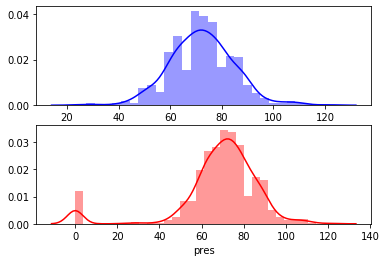

In [0]:
f, axes = plt.subplots(2)
sns.distplot(masszero_data['pres'], ax=axes[0],color='blue')
sns.distplot(data['pres'], ax=axes[1], color='red')
plt.show()

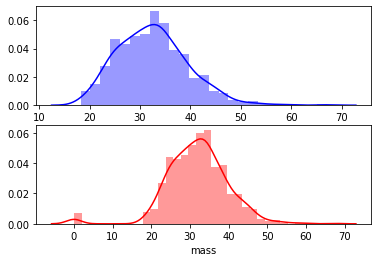

In [0]:
f, axes = plt.subplots(2)
sns.distplot(masszero_data['mass'], ax=axes[0],color='blue')
sns.distplot(data['mass'], ax=axes[1], color='red')
plt.show()